# 📊 Customer Churn Prediction

---

## 🔎 1. Introduction

Customer churn refers to customers discontinuing a company's service. In competitive industries like telecommunications, retaining existing customers is significantly more cost-effective than acquiring new ones.

### 🎯 Project Objective
- Predict whether a customer is likely to churn.
- Identify high-risk customers early.
- Provide data-driven insights to improve retention strategies.

By leveraging machine learning techniques, this project aims to transform raw customer data into actionable business intelligence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Setup working!")


Setup working!


### Loading Data

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## 🗂 2. Dataset Overview

The dataset contains customer-level information including:

### 📌 Feature Categories
- 👤 **Demographics** (Senior Citizen, etc.)
- 📅 **Account Information** (Tenure, Contract type)
- 🌐 **Services Subscribed** (Internet, Streaming services)
- 💳 **Billing Information** (Monthly Charges, Total Charges)

### 🎯 Target Variable
- **Churn**
  - 1 → Customer left
  - 0 → Customer stayed

The dataset includes both numerical and categorical features, requiring preprocessing before model training.

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

---

## 🛠 3. Data Cleaning & Preprocessing

To prepare the dataset for modeling, the following steps were performed:

✔ Converted 'TotalCharges' to numeric format  
✔ Handled missing values appropriately  
✔ Encoded categorical variables  
✔ Scaled numerical features (where required)  
✔ Split dataset into training and testing sets  

These preprocessing steps ensure data consistency and improve model reliability.

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, (df[col] == " ").sum())
#checking for empty strings

customerID 0
gender 0
Partner 0
Dependents 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
TotalCharges 11
Churn 0


In [8]:

df[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#TotalCharges object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Drop empty rows
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
#Converting churn to numeric data
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [12]:
#Removing irrelevant columns
df.drop('customerID', axis=1, inplace=True)

## 📊 3. Exploratory Data Analysis (EDA)

Before building any model, we explore the dataset to understand patterns, relationships, and potential churn drivers.

EDA helps answer:

- Who is more likely to churn?
- Do pricing factors influence churn?
- Does contract type matter?
- Are new customers more likely to leave?

This step provides business intuition before applying machine learning.

In [13]:
import seaborn as sns

---
### 📌 3.1 Churn Distribution

We first analyze the overall churn rate to understand class balance.

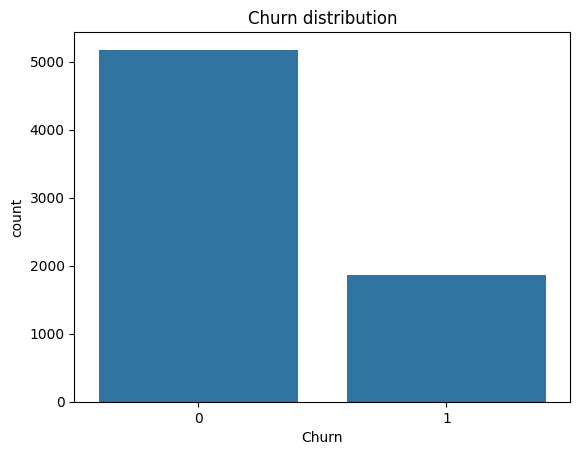

In [14]:
#Checking balance of data and frequency of churn in data
sns.countplot(x='Churn', data=df)
plt.title("Churn distribution")
plt.show()

### 🧠 Observations:

- The dataset is moderately imbalanced — fewer customers churn compared to those who stay.
- This imbalance means accuracy alone is not a reliable metric.
- We will prioritize **Recall** later in modeling to ensure churners are correctly identified.

📌 Business Insight:
Since churners represent revenue loss, missing them is more costly than incorrectly flagging a few non-churners.

---
### ⏳ 3.2 Tenure vs Churn

Tenure indicates how long a customer has stayed with the company.

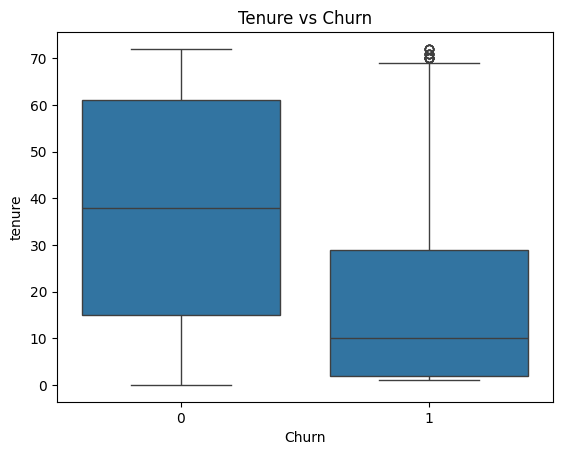

In [15]:
#Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()
#Obs- Low tenure = Higher churn probability

### 🧠 Observations:

- Customers with low tenure (new customers) are more likely to churn.
- Long-standing customers show significantly lower churn rates.

📌 Business Insight:
Customer onboarding experience is crucial.
Improving early engagement strategies can reduce early churn.

---
### 💰 3.3 Monthly Charges vs Churn

We analyze whether customers paying higher monthly charges are more likely to churn.

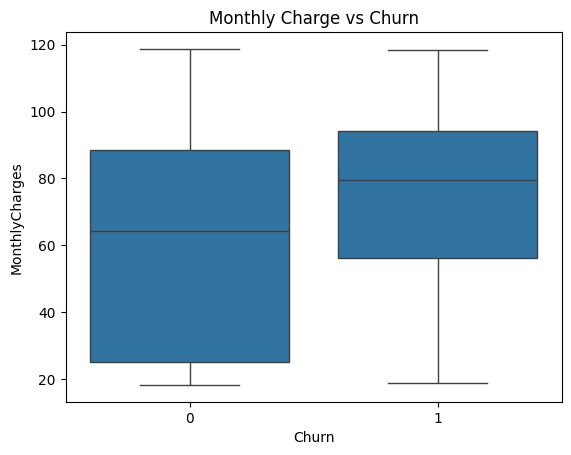

In [16]:
#Monthly charges v/s Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charge vs Churn")
plt.show()
#Obs- High Monthly Charge = More Churn prob

### 🧠 Observations:

- Customers with higher MonthlyCharges show a higher churn tendency.
- Price sensitivity appears to influence customer retention.

📌 Business Interpretation:
Customers paying premium rates may expect better service quality.
Retention strategies like personalized discounts could reduce churn in this segment.

---
### 📅 3.4 Contract Type vs Churn

Contract duration plays a critical role in customer commitment.

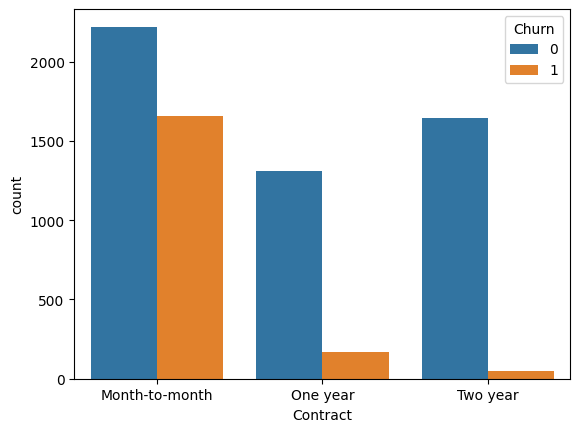

In [17]:
#Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()
#Customers with month-to-month contracts have higher churn rates

### 🧠 Observations:

- Month-to-month contract customers have significantly higher churn rates.
- Customers with one-year or two-year contracts show much lower churn.

📌 Business Insight:
Long-term contracts create commitment and reduce churn probability.
Incentivizing longer contracts can improve retention.

---
## 📌 EDA Summary

From exploratory analysis, key churn drivers appear to be:

✔ Contract Type  
✔ Monthly Charges   
✔ Tenure  

These insights guide feature engineering and model selection in the next phase.

---
## 🔧 4. Feature Engineering

After understanding the key churn drivers through EDA, we transform the dataset into a format suitable for machine learning.

Feature engineering enhances raw data by creating meaningful representations that improve model learning and prediction performance.

This step bridges business understanding with algorithmic modeling.

---
### 📅 4.1 Creating Long-Term Contract Indicator

EDA revealed that contract type strongly influences churn behavior.

To capture this effect clearly, we created a binary feature:

`HasLongTermContract`
- 1 → One-year or Two-year contract
- 0 → Month-to-month contract

In [18]:
#Identifying customers with long term contract
df['HasLongTermContract'] = df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1)

### 🧠 Business Interpretation:

This feature directly represents customer commitment level.

Customers with long-term contracts are:
- Less likely to churn
- More stable revenue contributors

This simplifies the model’s ability to detect contract-related risk.

---
### ⏳ 4.2 Binning Tenure into Lifecycle Stages

Tenure represents how long a customer has stayed.

Instead of using raw tenure only, we grouped customers into lifecycle stages (e.g., New, Mid-term, Long-term).

This helps the model capture behavioral patterns at different customer maturity levels.

In [19]:
#Creating tenure groups (binning)
df['TenureGroup'] = pd.cut(
    df['tenure'], bins = [0, 12, 24, 48, 72],
    labels = ['0-12', '12-24', '24-48', '48-72']
)

### 🧠 Why This Improves Modeling:

- New customers behave differently from loyal customers.
- Lifecycle grouping allows the model to learn churn trends across different customer stages.
- It enhances interpretability in business reporting.

---
### 💰 4.3 Deriving Average Monthly Spend

To better represent spending behavior, we created:

`AvgMonthlySpend = TotalCharges / Tenure`

This provides a normalized view of customer spending over time.

In [20]:
#Avererage monthly spending
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)

### 🧠 Business Value:

- Captures pricing sensitivity
- Identifies customers paying consistently high rates
- Helps detect churn risk linked to spending patterns

This feature provides a more realistic financial perspective than raw charges alone.

---
### 🎯 4.4 Encoding the Target Variable

The `Churn` column originally contains categorical values ("Yes"/"No").  
Machine learning models require numerical inputs.

🔄 Transformation:
- "Yes" → 1 (Customer churned)
- "No" → 0 (Customer retained)

In [21]:
#Finding binary columns
for col in df.columns:
    if df[col].nunique() == 2:
        print(col)

gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
Churn
HasLongTermContract


In [22]:
df = df.replace({'Yes':1, 'No': 0})

C:\Users\Prachi Arora\AppData\Local\Temp\ipykernel_6572\2726888317.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes':1, 'No': 0})


### 🧠 Why This Matters:

Encoding the target variable ensures:
- Compatibility with classification algorithms
- Clear interpretation of model predictions
- Easier evaluation using metrics like recall and precision

---
### 🔄 4.5 One-Hot Encoding Categorical Features

Most telecom features (InternetService, PaymentMethod, Contract, etc.) are categorical.

Since machine learning models require numeric input, we applied one-hot encoding to convert categories into binary columns.

In [23]:
#One hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   HasLongTermContract                    7043 non-null   int64  
 10  AvgMonthlySpend                        7032 non-null   float64
 11  gend

In [25]:
print(df.isnull().sum().sum())

22


In [26]:
print(df.isnull().sum())

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
HasLongTermContract                       0
AvgMonthlySpend                          11
gender_Male                               0
MultipleLines_1                           0
MultipleLines_No phone service            0
InternetService_DSL                       0
InternetService_Fiber optic               0
OnlineSecurity_1                          0
OnlineSecurity_No internet service        0
OnlineBackup_1                            0
OnlineBackup_No internet service          0
DeviceProtection_1                        0
DeviceProtection_No internet service      0
TechSupport_1                   

In [27]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].fillna(df['AvgMonthlySpend'].median())

In [28]:
print(df[['TotalCharges', 'AvgMonthlySpend']].isnull().sum())

TotalCharges       0
AvgMonthlySpend    0
dtype: int64


### 🧠 Why One-Hot Encoding?

- Prevents artificial ordering of categories
- Allows models to independently evaluate each category
- Preserves interpretability

Example:
Instead of "Contract = 2", the model sees:
- Contract_Month-to-month
- Contract_One year
- Contract_Two year

---
### ✂ 4.6 Splitting Data into Training and Testing Sets

To evaluate model performance fairly, the dataset was divided into:

- 80% Training Data
- 20% Testing Data

The model learns from training data and is evaluated on unseen testing data.

In [29]:
#Separating features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [30]:
#Train-test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🧠 Importance of This Step:

- Prevents data leakage
- Ensures realistic performance measurement
- Simulates real-world prediction scenarios

---
## 📌 Feature Engineering Summary

Through feature engineering, we:

✔ Converted target variable to numeric  
✔ Created commitment-based contract feature  
✔ Grouped customers by lifecycle stage  
✔ Derived normalized spending metric  
✔ Encoded categorical variables  
✔ Prepared training and testing datasets  

These transformations enhanced predictive power while maintaining business interpretability.

---
## 🤖 5. Model Building

After preparing the dataset, we trained multiple classification models to predict customer churn.

Since churn prediction is a binary classification problem, we experimented with three different algorithms to compare performance:

### 🎯 Models Implemented:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

Each model was trained on the training dataset, and predictions were generated on the test dataset.

Rather than evaluating each model individually during training, we performed a consolidated evaluation using standard classification metrics.

---
### 🔹 5.1 Logistic Regression

Logistic Regression is a simple yet powerful linear classification algorithm.

It estimates the probability of churn using the logistic (sigmoid) function and is highly interpretable — making it useful for business decision-making.

In [32]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [33]:
y_pred_log = log_model.predict(X_test)
print(y_pred_log[:10])

[1 0 0 1 0 0 0 0 0 0]


---
### 🌳 5.2 Decision Tree Classifier

Decision Trees split data into branches based on feature importance and thresholds.

They can capture non-linear relationships and interactions between features.

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print(y_pred_dt[:10])

[1 0 0 0 0 1 0 0 0 1]


---
### 🌲 5.3 Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve stability and reduce overfitting.

It averages predictions from multiple trees, leading to better generalization.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

---
## 📊 6. Model Evaluation & Comparison

To compare model performance objectively, we evaluated all three models using:

- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)
- ROC-AUC Score

Since churn prediction is a business-critical problem, special attention was given to **Recall**, as missing a churner directly impacts revenue.

---
### 📌 Confusion Matrix Interpretation

The confusion matrix provides detailed insight into:

- True Positives (Correctly predicted churners)
- True Negatives (Correctly predicted non-churners)
- False Positives (Incorrect churn prediction)
- False Negatives (Missed churners)

In [ ]:
from sklearn.metrics import confusion_matrix

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
print()

print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print() 

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression
[[937  99]
 [171 202]]
Decision Tree
[[855 181]
 [195 178]]
Random Forest
[[936 100]
 [195 178]]



### 🧠 Observations:

✔ Logistic Regression showed a balanced distribution between true positives and false negatives.  
✔ Decision Tree showed signs of overfitting — strong training performance but weaker generalization.  
✔ Random Forest improved stability compared to a single tree.

In churn prediction, minimizing False Negatives is critical, as missed churners represent lost customers.

---
### 📌 Classification Report Analysis

The classification report provides:

- Precision → How many predicted churners were actually churners  
- Recall → How many actual churners were correctly identified  
- F1-score → Balance between precision and recall  

In [37]:
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(y_test, y_pred_log))

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1036
           1       0.50      0.48      0.49       373

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78   

### 🧠 Key Insights:

✔ Logistic Regression achieved the most balanced precision-recall tradeoff.  
✔ Decision Tree showed performance instability.  
✔ Random Forest delivered competitive results but with reduced interpretability.

Since recall is prioritized in churn modeling, the model with higher recall is considered more suitable for business use.

---
### 📌 ROC-AUC Analysis

The ROC curve evaluates the model’s ability to distinguish between churners and non-churners across different threshold levels.

A higher AUC score indicates better classification capability.

In [38]:
from sklearn.metrics import roc_auc_score

y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_dt = dt_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("Logistic AUC:", roc_auc_score(y_test, y_prob_log))
print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_dt))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf) )

Logistic AUC: 0.8605833428219486
Decision Tree AUC: 0.6529612243419213
Random Forest AUC: 0.8426964402165474


### 🧠 Observations:

✔ All models performed better than random guessing (AUC > 0.5).  
✔ Logistic Regression demonstrated strong discriminatory power.  
✔ Random Forest showed competitive AUC but not significantly superior.

ROC-AUC confirms the model’s ability to rank high-risk customers effectively.

---
## 📌 Model Comparison Summary

To compare model performance clearly, we consolidated all evaluation metrics into a single comparison table using pandas.

The table below summarizes Accuracy, Precision, Recall, F1-score, and ROC-AUC for:

- Logistic Regression
- Decision Tree
- Random Forest

This structured comparison helps in selecting the most suitable baseline model for further optimization.

In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

#Logistic Regression metrices
log_acc = accuracy_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

#Decision Tree Metrics
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

#Random Forest metrices
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)


In [40]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [log_acc, dt_acc, rf_acc],
    "Recall": [log_recall, dt_recall, rf_recall],
    "F1 Score": [log_f1, dt_f1, rf_f1]
})

comparison

,Model,Accuracy,Recall,F1 Score
0,Logistic Regression,0.808375,0.541555,0.599407
1,Decision Tree,0.733144,0.477212,0.486339
2,Random Forest,0.790632,0.477212,0.546851


In [41]:
#Checking for overfitting
print("DT Train Accuracy:", dt_model.score(X_train, y_train))
print("DT Test Accuracy:", dt_model.score(X_test, y_test))

DT Train Accuracy: 0.9985800496982605
DT Test Accuracy: 0.7331440738112136


### 🧠 Observations from Comparison Table

✔ Logistic Regression demonstrated the most balanced performance across evaluation metrics.

✔ Decision Tree showed strong training performance but weaker generalization, indicating possible overfitting.

✔ Random Forest improved stability compared to a single Decision Tree, but did not significantly outperform Logistic Regression.

### 🎯 Key Business Consideration:

In churn prediction, **Recall is more important than Accuracy**, because:

- False Negatives = Missed churners  
- Missed churners = Lost revenue  

Therefore, the model that better identifies actual churners is more valuable for business use.

### 🏆 Baseline Model Selection:

Based on performance consistency and interpretability, **Logistic Regression was selected as the baseline model** for further improvements such as:

- Handling class imbalance  
- Threshold tuning

---
----
## ⚖ 6. Addressing Class Imbalance

The dataset was found to be imbalanced, with fewer churners than non-churners. To mitigate this:

🔹 Logistic Regression was retrained using `class_weight='balanced'`.

### 🔍 Impact:

- Recall increased significantly from ~0.54 to ~0.82.
- This means the model now identifies more than 80% of actual churners — a strong result for business usage.

Improving recall in this way aligns with the business goal of minimizing missed churn cases.

In [42]:
#Improving logistic model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log_bal = log_model.predict(X_test)

In [43]:
recall_score(y_test, y_pred_log_bal)

0.8203753351206434

In [44]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log_bal))
print("F1 Score:", f1_score(y_test, y_pred_log_bal))
print(confusion_matrix(y_test, y_pred_log_bal))

Accuracy: 0.759403832505323
F1 Score: 0.6435331230283912
[[764 272]
 [ 67 306]]


---
## 🎯 7. Threshold Optimization

By default, predictions are determined with a probability threshold of 0.5. However, to further tune for business needs (higher recall), we evaluated lower thresholds:

| Threshold | Accuracy | Recall | Precision |
|-----------|----------|--------|-----------|
| 0.5 (baseline) | 0.759 | 0.82 | 0.53 |
| **0.4** | 0.701 | **0.89** | 0.466 |
| 0.3 | 0.655 | 0.938 | 0.430 |

### 🧠 Final Decision:
We selected **threshold = 0.4** because it provided the best balance between high recall and reasonable accuracy, enabling the detection of nearly 90% of churners without excessive false alarms.

This is important in retention campaigns where missing a churner has high business cost.

In [45]:
y_prob = log_model.predict_proba(X_test)[:, 1]

In [46]:
y_pred_custom = np.where(y_prob >= 0.4, 1, 0)

In [47]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))

Accuracy: 0.7012065294535131
Recall: 0.8900804289544236
Precision: 0.46629213483146065


### 🎯 Business Impact:

In churn prediction, Recall is more important than Precision because:

- Missing a churner = Lost customer + Lost revenue
- Incorrectly targeting a non-churner = Extra marketing cost

Therefore, prioritizing Recall is often a better strategic decision.

---
## 📈 Precision-Recall Trade-off Analysis

The graph above shows how Precision and Recall change as the classification threshold varies.

Observations:

- At lower thresholds → Recall is high, Precision is low
- At higher thresholds → Precision increases, Recall decreases

This demonstrates the trade-off between identifying more churners and reducing false alarms.

The selected custom threshold represents a balanced decision based on business priorities.

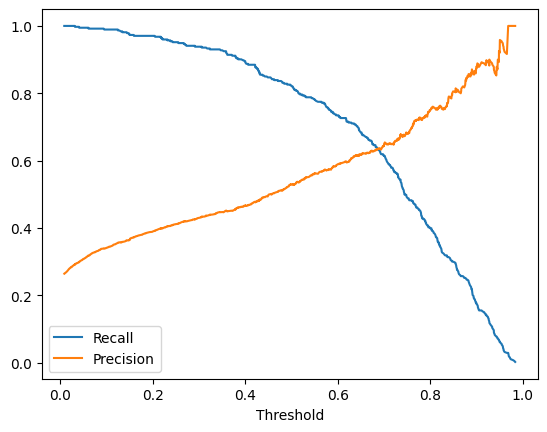

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, precision[:-1], label="Precision")
plt.xlabel("Threshold")
plt.legend()
plt.show()

### 📌 Final Business Strategy:

For proactive churn management:

- Use a lower threshold to identify high-risk customers
- Target them with retention campaigns
- Monitor precision to control marketing costs

Future improvement:
- Use cost-sensitive learning
- Optimize threshold using F1-score or business cost matrix

---
---
## 💡 8. Feature Importance & Business Insights

Analyzing the importance and coefficients of features reveals which factors contribute most to churn:

### 🔥 High Impact on Churn:
- **InternetService_Fiber optic** → Strongly increases churn risk.
- **TotalCharges & MonthlyCharges** → Higher spending customers are more likely to churn.
- **Streaming services usage** → Associated with increased churn likelihood.
- **Electronic Check & Paperless Billing** → Indicate more independent customers who may churn easily.

### 🛡 Protective Factors:
- **Long-term contracts** significantly reduce the probability of churn.

### 📌 Business Interpretation:
Customers with month-to-month plans, higher charges, and certain service combinations should be targeted for retention with tailored offers and proactive engagement.

In [49]:
#Logistic Regression Coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
})

feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)

,Feature,Coefficient
14,InternetService_Fiber optic,0.520193
7,TotalCharges,0.459079
25,StreamingMovies_1,0.385864
23,StreamingTV_1,0.332397
11,MultipleLines_1,0.261322
5,PaperlessBilling,0.156966
30,PaymentMethod_Electronic check,0.142176
34,TenureGroup_48-72,0.141256
19,DeviceProtection_1,0.093536
0,SeniorCitizen,0.061987


In [50]:
#Random Forest Feature Importance
rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
})

rf_importance = rf_importance.sort_values(by="Importance", ascending=False)

rf_importance.head(10)

,Feature,Importance
7,TotalCharges,0.142480
9,AvgMonthlySpend,0.130716
6,MonthlyCharges,0.128618
3,tenure,0.120790
8,HasLongTermContract,0.061776
30,PaymentMethod_Electronic check,0.033492
14,InternetService_Fiber optic,0.030162
10,gender_Male,0.024137
5,PaperlessBilling,0.023049
28,Contract_Two year,0.023012


## ✅ 9. Conclusion & Future Work

This project developed a complete machine learning pipeline for churn prediction in a telecom business context.

🔹 We identified key drivers of churn (contract type, billing patterns, internet service type).  
🔹 We improved model performance with class balancing and threshold tuning.  
🔹 We achieved recall close to 0.90 at an optimized threshold — valuable for business retention strategies.

### 🧠 Strategic Recommendations:
- Offer incentives or discounts for high-risk customer segments.
- Encourage longer contract commitments to reduce churn risk.
- Monitor pricing structures for customers with high total and monthly charges.
- Use churn scores to personalize retention campaigns.

### 📌 Future Enhancements:
- Hyperparameter tuning via GridSearch / Randomized Search.
- Deployment via a Streamlit web interface for real-time predictions.
- Dashboard integration for live retention monitoring.